# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/bank-additional-full.csv", sep = ";")

In [5]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [6]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

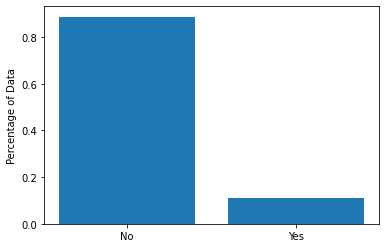

In [8]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [9]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [10]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification

In [11]:
###TRANSFORM###
clf = RandomOverSampler()
X_scaled, y_train= clf.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [12]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.032\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.493\ngini = 0.381\nsamples = 24225\nvalue = [18034, 6191]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.203\nsamples = 11142\nvalue = [9867, 1275]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.174\nsamples = 10820\nvalue = [9776, 1044]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.405\nsamples = 322\nvalue = [91, 231]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 0.283\ngini = 0.469\nsamples = 13083\nvalue = [8167, 4916]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.499\nsamples = 9438\nvalue = [4970, 4468]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.216\nsamples = 3645\nvalue = [3197, 448]\nclass = No'),
 Text(0.75, 0.625, 'duration <= 1.025\ngini = 0.403\nsamples = 26935\nvalue = [7546, 19389]\nclass = Yes'),
 Text(0.625, 0.375, 'contact_telephone <= 0.283\ngini = 0.483\nsamples = 14208\nvalue = [5807, 8401]\ncla

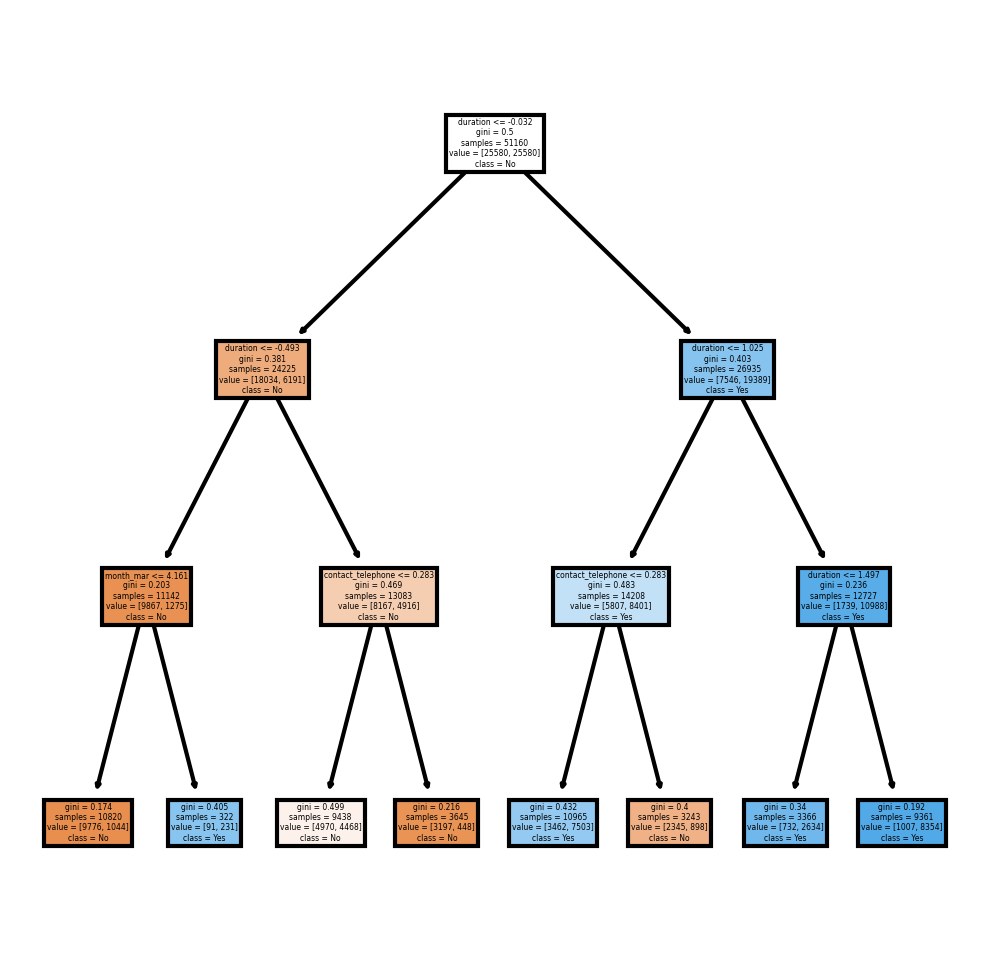

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [14]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

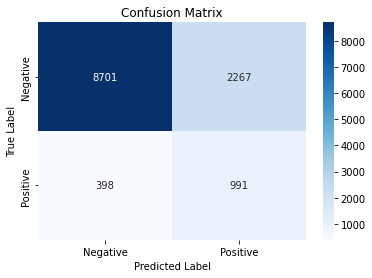

In [15]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [16]:
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7568989236869791


In [17]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

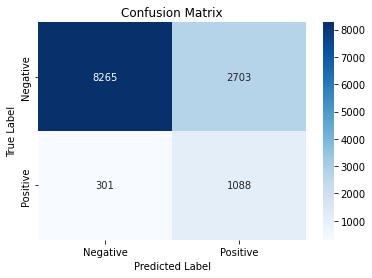

In [18]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [19]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [21]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

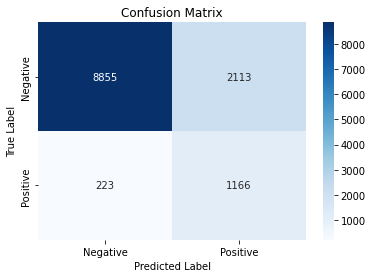

In [22]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [23]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 5.5 MB/s eta 0:00:00


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [25]:
### SET YOUR BASE LEARNERS
base_estimators = [
    LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(max_depth=5),AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)
]

super_learner = SuperLearner(folds=10, random_state=42)
super_learner.add(base_estimators)
### FIT TO TRAINING DATA
super_learner.fit(X_scaled, y_train)
### GET base_predictions
base_predictions = super_learner.predict(X_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A 

In [26]:
base_predictions

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [ ]:
### TRAIN YOUR METALEARNER

In [27]:
log_reg=LogisticRegression(fit_intercept=False).fit(base_predictions,y_train)
y_pred=log_reg.predict(super_learner.predict(X_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
### INTERPRET COEFFICIENTS

In [28]:
log_reg.coef_

array([[-1.78819158, -4.72358598, -3.83541772, -2.2848792 , 19.56239542]])

The coefficients represent the effect of a particular base learner model on the outcome variable, after adjusting for the effects of all the other base learner models included in the superlearner. A positive coefficient indicates that the model contributes positively to the prediction of the outcome variable and a negative coefficient indicates that the model contributes negatively to the prediction of the outcome variable. The magnitude of the coefficient indicates the relative importance of the corresponding base learner model in the superlearner.

Therefore, the output of the base learner model: LogisticRegression, RandomForestClassifier, KNeighborsClassifier, DecisionTreeClassifier  increases, the predicted probability of the outcome variable being in a particular class also increases while the output of the base learner model: AdaBoostClassifier increases, the predicted probability of the outcome variable being in a particular class decreases. Moreover, AdaBoostClassifier has a stronger effect on the predicted probability of the outcome variable.

In [29]:
from sklearn.metrics import recall_score

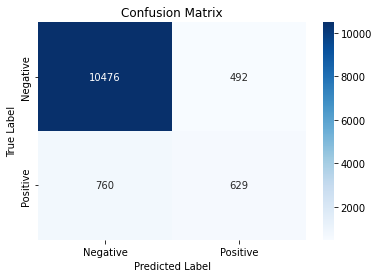

In [30]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
#Logistic Regression
y_true = y_test
cm_log = confusion_matrix(y_true, y_pred)
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<ipython-input-31-9f0df23070af>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg2=RandomForestClassifier().fit(base_predictions,y_train)


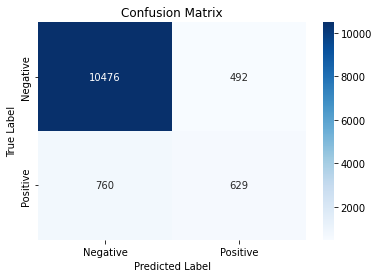

In [31]:
#RandomForest
reg2=RandomForestClassifier().fit(base_predictions,y_train)
y_reg2=reg2.predict(super_learner.predict(X_test))
cm_reg2 = confusion_matrix(y_true, y_reg2)
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_reg2, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


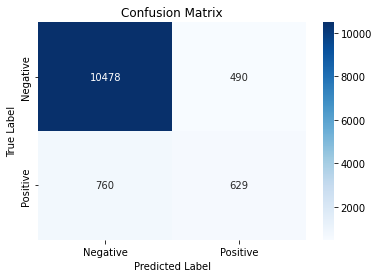

In [32]:
#KNeighborsClassifier
reg3=KNeighborsClassifier(n_neighbors=5).fit(base_predictions,y_train)
y_reg3=reg3.predict(super_learner.predict(X_test))
cm_reg3 = confusion_matrix(y_true, y_reg3)
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_reg3, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

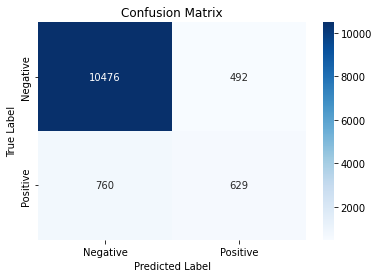

In [33]:
#Decision Tree
reg4=DecisionTreeClassifier(max_depth=5).fit(base_predictions,y_train)
y_reg4=reg4.predict(super_learner.predict(X_test))
cm_reg4 = confusion_matrix(y_true, y_reg4)
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_reg4, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)
y_pred = dtree.predict(X_test)
bagged_pred = bagging.predict(X_test)
boosted_pred = adaboost.predict(X_test)
super_learner_pred = log_reg.predict(super_learner.predict(X_test))

In [40]:
recall1 = recall_score(y_test, y_pred)
recall1

0.7134629229661628

In [41]:
recall2 = recall_score(y_test, bagged_pred)
recall2

0.7832973362131029

In [42]:
recall3 = recall_score(y_test, boosted_pred)
recall3

0.8394528437724982

In [43]:
recall4 = recall_score(y_test, super_learner_pred)
recall4

0.4528437724982001

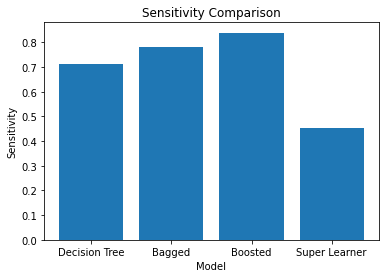

In [44]:
models = ['Decision Tree', 'Bagged', 'Boosted', 'Super Learner']
sensitivities = [recall1, recall2, recall3, recall4]

# Create bar chart
fig, ax = plt.subplots()
ax.bar(models, sensitivities)

# Set chart title and axis labels
ax.set_title('Sensitivity Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Sensitivity')

# Show the chart
plt.show()